In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
from scikitplot.metrics import plot_roc, plot_lift_curve
from sklearn.metrics import confusion_matrix, make_scorer, classification_report
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import warnings
warnings.filterwarnings('ignore')
# from scikeras.wrappers import KerasRegressor


In [2]:
df = pd.read_csv('../data/santander-customer-transaction-prediction/train.csv')
# values = df.values
# X = values[:, :-1]
# Y = values[:, -1]
df

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [12]:
values = df.values
X = values[:,2:]
Y = values[:,1]

In [55]:
model_names = []

clf1 = LogisticRegression(class_weight='balanced', max_iter=10000)
pipe1 = Pipeline([('std', StandardScaler()), ('clf1', clf1)])
p_grid1 = [{'clf1__C': np.power(10, range(0, 10))}]
model_names.append('Logistic')

clf2 = KNeighborsClassifier()
pipe2 = Pipeline([('std', StandardScaler()), ('clf2', clf2)])
p_grid2 = [{'clf2__n_neighbors': range(1, 10)}]
model_names.append('KNN')

clf3 = DecisionTreeClassifier(class_weight='balanced')
p_grid3 = [{'clf3__max_depth': range(1, 10), 'clf3__criterion': [
    'gini', 'entropy']}]
pipe3 = Pipeline([('std', StandardScaler()), ('clf3', clf3)])
model_names.append('Decision Tree')

clf4 = SVC(class_weight='balanced')
pipe4 = Pipeline([('std', StandardScaler()), ('clf4', clf4)])
p_grid4 = [{'clf4__kernel': ['rbf'], 'clf4__C': np.power(10, range(0, 5)), 'clf4__gamma': np.power(10., range(-5, 0))},
           {'clf4__kernel': ['linear'], 'clf4__C': np.power(10, range(0, 5))}]
model_names.append('SVC')

clf5 = MLPClassifier(random_state=29)
p_grid5 = [{'clf5__activation': ['relu', 'tanh'], 'clf5__solver': ['lbfgs', 'adam'], 
'clf5__hidden_layer_sizes': [(200), (200, 100), (100, 100)]}]
pipe5 = Pipeline([('std', StandardScaler()), ('clf5', clf5)])
model_names.append('Neural Net')

clf6 = XGBClassifier(seed=29, verbosity=0)
p_grid6 = [{'clf6__n_estimators': [100, 500, 1000], 'clf6__max_depth': range(2, 11), 
'clf6__eta': np.power(10., range(-4, 1)), 'clf6__subsample': [0.1, 0.5, 1], 'clf6__colsample_bytree': [0.1, 0.5, 1]}]
pipe6 = Pipeline([('std', StandardScaler()), ('clf6', clf6)])
model_names.append('xgboost')

inner_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=29)
outer_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=29)
grid_cv = []

for p_grid, est in zip((p_grid1, p_grid2, p_grid3, p_grid4, p_grid5, p_grid6), (pipe1, pipe2, pipe3, pipe4, pipe5, pipe6)):
    gs = GridSearchCV(estimator=est, param_grid=p_grid, scoring='f1', cv=inner_cv)
    # gs = RandomizedSearchCV(estimator=est, param_distributions=p_grid,
    #                         scoring='f1', cv=inner_cv, random_state=29)
    grid_cv.append(gs)


In [51]:
nested_scores = []
for i in range(len(grid_cv)):
    nested_score = cross_val_score(grid_cv[i], X=X, y=Y, cv=outer_cv, scoring='f1')
    nested_scores.append((model_names[i], nested_score.mean(), nested_score.std()))
nested_scores
x = pd.DataFrame(nested_scores)
x.to_csv('x', index=False, header=False)


[('Logistic', 0.906907589973516, 0.010989850507871988),
 ('KNN', 0.872545101731896, 0.011190827673510987),
 ('Decision Tree', 0.89138703619591, 0.02066604148553987),
 ('SVC', 0.9063246233564621, 0.013268356312041834),
 ('Neural Net', 0.9238779663007578, 0.016738296609973655),
 ('xgboost', 0.9309996597226964, 0.012794762215576436)]

Running all models without normalization

Normalization helps with training faster and improves model performance for non-tree based models <br>
This behavior is as expected <br>

In [24]:
exit()

In [151]:
# hp_model = RandomizedSearchCV(estimator=clf6, param_distributions=p_grid6, scoring='f1', cv=inner_cv, random_state=29)
# hp_model.fit(x_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=29, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None...
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None, seed=29,
                                       

In [152]:
best_model = hp_model.best_estimator_
pred = best_model.predict(pd.DataFrame(x_test))
print(classification_report(y_test, pred))
prob = best_model.predict_proba(pd.DataFrame(x_test))
hp_model.best_params_


              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96       543
         1.0       0.94      0.93      0.94       378

    accuracy                           0.95       921
   macro avg       0.95      0.95      0.95       921
weighted avg       0.95      0.95      0.95       921



{'subsample': 1,
 'n_estimators': 100,
 'max_depth': 10,
 'eta': 1.0,
 'colsample_bytree': 1}

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

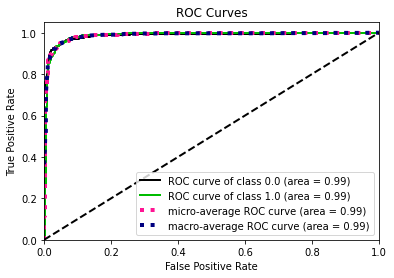

In [62]:
plot_roc(y_test, prob)

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

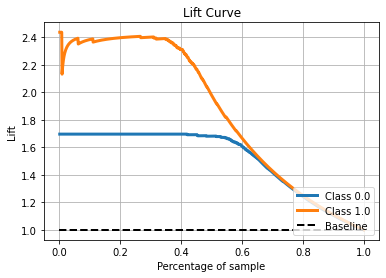

In [63]:
plot_lift_curve(y_test, prob)

2-ii) <br>
Cost-sensitive classification <br>
Misclassifying a non-spam email as spam is the costlier error and the costs are calculated accordingly

In [64]:
def missclass_cost(actual, pred):
    cm = confusion_matrix(actual, pred)
    return (10*cm[0,1]+1*cm[1,0])/(len(actual))

In [65]:

model_names = []
scorer = make_scorer(missclass_cost, greater_is_better = False)

clf1 = LogisticRegression(class_weight='balanced', max_iter=10000)
pipe1 = Pipeline([('std', StandardScaler()), ('clf1', clf1)])
p_grid1 = [{'clf1__C': np.power(10, range(0, 10))}]
model_names.append('Logistic')

clf2 = KNeighborsClassifier()
pipe2 = Pipeline([('std', StandardScaler()), ('clf2', clf2)])
p_grid2 = [{'clf2__n_neighbors': range(1, 10)}]
model_names.append('KNN')

clf3 = DecisionTreeClassifier(class_weight='balanced')
p_grid3 = [{'max_depth': range(1, 10), 'criterion': [
    'gini', 'entropy']}]
model_names.append('Decision Tree')

clf4 = SVC(class_weight='balanced')
pipe4 = Pipeline([('std', StandardScaler()), ('clf4', clf4)])
p_grid4 = [{'clf4__kernel': ['rbf'], 'clf4__C': np.power(10, range(0, 5)), 'clf4__gamma': np.power(10., range(-5, 0))},
           {'clf4__kernel': ['linear'], 'clf4__C': np.power(10, range(0, 5))}]
model_names.append('SVC')

clf5 = MLPClassifier(random_state=29)
p_grid5 = [{'clf5__activation': ['relu', 'tanh'], 'clf5__solver': ['lbfgs', 'adam'], 
'clf5__hidden_layer_sizes': [(22), (22, 22), (12, 12)]}]
pipe5 = Pipeline([('std', StandardScaler()), ('clf5', clf5)])
model_names.append('Neural Net')

clf6 = XGBClassifier(seed=29, verbosity=0)
p_grid6 = [{'n_estimators': [100, 500, 1000], 'max_depth': range(2, 11),
 'eta': np.power(10., range(-4, 1)), 'subsample': [0.1, 0.5, 1], 'colsample_bytree': [0.1, 0.5, 1]}]
model_names.append('xgboost')

inner_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=29)
outer_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=29)
grid_cv = []

for p_grid, est in zip((p_grid1, p_grid2, p_grid3, p_grid4, p_grid5, p_grid6), (pipe1, pipe2, clf3, pipe4, pipe5, clf6)):
    gs = RandomizedSearchCV(estimator=est, param_distributions=p_grid, scoring=scorer, cv=inner_cv, random_state=29)
    grid_cv.append(gs)


Getting the negative avg misclassification costs for all models

In [66]:
nested_scores = []
for i in range(len(grid_cv)):
    print('Running model: ', model_names[i])
    nested_score = cross_val_score(grid_cv[i], X=x_train, y=y_train, cv=outer_cv, scoring=scorer)
    nested_scores.append((model_names[i], nested_score.mean(), nested_score.std()))
nested_scores

Running model:  Logistic
Running model:  KNN
Running model:  Decision Tree
Running model:  SVC
Running model:  Neural Net
Running model:  xgboost


[('Logistic', -0.44456521739130433, 0.06862475703332431),
 ('KNN', -0.3171195652173913, 0.03784400344054943),
 ('Decision Tree', -0.40951086956521743, 0.0599423508097982),
 ('SVC', -0.360054347826087, 0.03613517437389968),
 ('Neural Net', -0.3326086956521739, 0.03877404126464558),
 ('xgboost', -0.17201086956521738, 0.025192723598417028)]

Hyper parameter tuning the best model - xgboost

In [114]:
hp_model = RandomizedSearchCV(estimator=clf6, param_distributions=p_grid6, scoring=scorer, cv=inner_cv, random_state=29)
hp_model.fit(x_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=29, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None...
                                           scale_pos_weight=None, seed=29,
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                           verb

In [147]:
best_model = hp_model.best_estimator_
prob = best_model.predict_proba(pd.DataFrame(x_test))
y_test_sorted = y_test[np.flip(np.argsort(prob[:,1]))]
prob_sorted = np.flip(np.sort(prob[:,1]))
hp_model.best_params_

{'subsample': 1,
 'n_estimators': 100,
 'max_depth': 10,
 'eta': 0.01,
 'colsample_bytree': 0.1}

In [124]:
pred_arr = np.zeros(len(y_test))
i1 = 0
c1 = missclass_cost(y_test_sorted, pred_arr)
arr = [c1]
for i in range(len(y_test_sorted)):
    pred_arr[i]=1
    c = missclass_cost(y_test_sorted, pred_arr)
    if c < c1: 
        c1 = c
        i1 = i+1
        arr.append(c1)
i1, c1

(246, 0.19109663409337677)

The min avg misclassification cost is 0.19

In [127]:
pred = np.zeros(len(y_test))
pred[:246]=1
print(prob_sorted[i1], prob_sorted[i1-1])

0.56814295 0.56834865


The threshold can be set at any value between 0.56814295 and 0.56834865

In [134]:
print(classification_report(y_test_sorted, pred))
print('Average Misclassification Cost: ', missclass_cost(y_test_sorted, pred))

              precision    recall  f1-score   support

         0.0       0.80      0.99      0.89       543
         1.0       0.98      0.64      0.78       378

    accuracy                           0.85       921
   macro avg       0.89      0.82      0.83       921
weighted avg       0.87      0.85      0.84       921

Average Misclassification Cost:  0.19109663409337677


Plotting avg misclassification cost at different thresholds

In [108]:
thresholds = np.linspace(0, 1.0, num=21)
cost_list=np.linspace(0, 1.0, num=21)
y_test_sorted = y_test[np.flip(np.argsort(prob[:,1]))]
index=0
for t in thresholds:
   predict_thre = np.where(np.flip(np.sort(prob[:,1])) > t, 1, 0)
   cost_list[index] = missclass_cost(y_test_sorted, predict_thre)
   index+=1

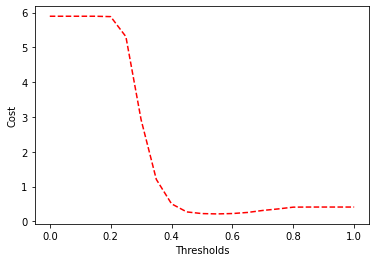

In [109]:
plt.figure(1)
plt.plot(thresholds,  cost_list, 'r--')
plt.xlabel("Thresholds")
plt.ylabel("Cost")
plt.show()

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

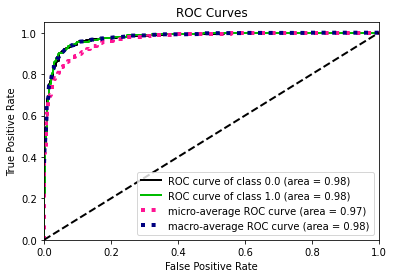

In [132]:
plot_roc(y_test, prob)

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

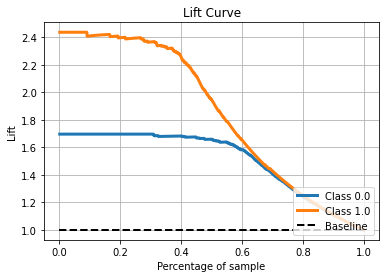

In [133]:
plot_lift_curve(y_test, prob)

The cost-based model training decreases the other performance metrics of the model <br>
except for recall of class-0 and precision of class-1. This is expected given the class costs. <br>